<h2 style="display: flex; justify-content: space-between; align-items: center;">
    <span>Exercise 12b</span>
    <span>Date: 26/03/2025</span>
</h2>

<h1 style="text-align:center;">Multi Layer Perceptron</h1> 

### <ins>**Aim:**</ins> To build a Multi Layer Perceptron to perform classification on non-linearly separable data.

### <ins>**Algorithm:**</ins>

A Multi-Layer Perceptron (MLP) is a feedforward artificial neural network model that maps sets of input data onto appropriate output. It consists of at least three layers of nodes: an input layer, one or more hidden layers, and an output layer. Each node (neuron) in one layer connects with a certain weight to every node in the following layer.

The learning process involves:

- Forward Propagation: To compute outputs layer by layer using activation functions.

- Backward Propagation: To update weights by calculating gradients using the chain rule (via the derivative of the sigmoid function).

The output is classified using a sigmoid activation function, and predictions are thresholded at 0.5.

Step 1: Import Libraries

- Import necessary libraries such as numpy, matplotlib.pyplot, and required modules from sklearn for dataset creation, preprocessing, model evaluation, and splitting.

Step 2: Load the Dataset

- Generate a non-linearly separable dataset using make_moons with 500 samples and added noise for complexity.

Step 3: Preprocess the Data

- Normalize the feature values using StandardScaler to standardize the data and improve training efficiency.

Step 4: Split the Dataset

- Split the scaled data into training and testing sets using an 80-20 ratio to evaluate generalization.

Step 5: Define the Multi-Layer Perceptron

- Implement a custom MultiLayerPerceptron class with one hidden layer using the sigmoid activation function, forward propagation, and gradient descent-based backpropagation.

Step 6: Train the Model

- Train the MLP on the training set for a fixed number of epochs using the defined learning rate to minimize the prediction error.

Step 7: Evaluate the Model

- Use the trained model to make predictions on the test set and compute the accuracy score using accuracy_score.

Step 8: Visualize the Data

- Plot the original dataset using a scatter plot to show the non-linear class distribution.

Step 9: Visualize the Decision Boundary

- Plot the decision boundary learned by the MLP using contour plots to illustrate how well the model has separated the two classes.

### Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Load the dataset

In [2]:
X_nonlinear, y_nonlinear = make_moons(n_samples=500, noise=0.2, random_state=42)

### Preprocess the data

In [3]:
scaler = StandardScaler()
X_nonlinear = scaler.fit_transform(X_nonlinear)

### Split features and target

In [4]:
X_train_non, X_test_non, y_train_non, y_test_non = train_test_split(X_nonlinear, y_nonlinear, test_size=0.2, random_state=42)

### Multi Layer Perceptron

In [5]:
class MultiLayerPerceptron:
    def __init__(self, input_dim, hidden_dim, output_dim=1, learning_rate=0.1, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.W1 = np.random.randn(input_dim, hidden_dim) * 0.1
        self.b1 = np.zeros((1, hidden_dim))
        self.W2 = np.random.randn(hidden_dim, output_dim) * 0.1
        self.b2 = np.zeros((1, output_dim))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, a):
        return a * (1 - a)

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.sigmoid(self.Z2)
        return self.A2

    def backward(self, X, y, output):
        m = X.shape[0]
        dZ2 = output - y.reshape(-1, 1)
        dW2 = (1 / m) * np.dot(self.A1.T, dZ2)
        db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.sigmoid_derivative(self.A1)
        dW1 = (1 / m) * np.dot(X.T, dZ1)
        db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)

        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1

    def train(self, X, y):
        for _ in range(self.epochs):
            output = self.forward(X)
            self.backward(X, y, output)

    def predict(self, X):
        probs = self.forward(X)
        return (probs >= 0.5).astype(int).flatten()

### Train the model

In [6]:
mlp_nonlinear = MultiLayerPerceptron(input_dim=2, hidden_dim=10)
mlp_nonlinear.train(X_train_non, y_train_non)

### Performance Metrics

In [7]:
y_pred_non = mlp_nonlinear.predict(X_test_non)
print("Accuracy (Non-Linear Data):", accuracy_score(y_test_non, y_pred_non))

Accuracy (Non-Linear Data): 0.86


### Plot the graph

In [8]:
def plot_data(X, y, title):
    plt.figure(figsize=(5, 4))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

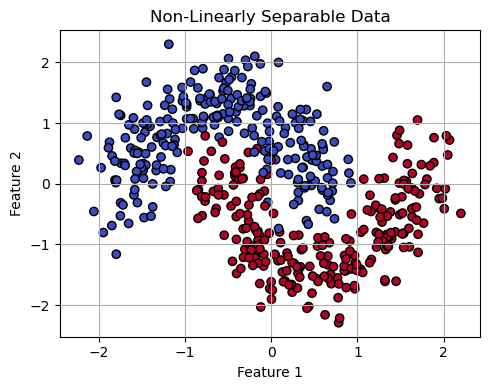

In [9]:
plot_data(X_nonlinear, y_nonlinear, "Non-Linearly Separable Data")

In [10]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid)
    preds = preds.reshape(xx.shape)
    plt.figure(figsize=(5, 4))
    plt.contourf(xx, yy, preds, cmap=plt.cm.coolwarm, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.tight_layout()
    plt.show()

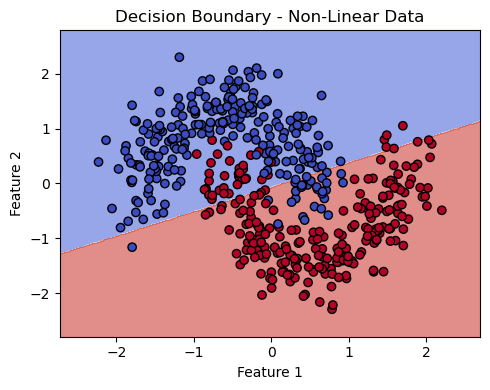

In [11]:
plot_decision_boundary(mlp_nonlinear, X_nonlinear, y_nonlinear, "Decision Boundary - Non-Linear Data")

### Result

A Multi-Layer Perceptron classifier was built from scratch to classify linearly separable data. The model achieved an accuracy of 86%, clearly visualized by the decision boundary plot.

---